This assignment deals with principal component analysis (PCA) and linear discriminant analysis (LDA).

# PCA
First, you will experiment with PCA. This will also serve as your introduction to the scikit-learn library. For more information about the PCA module in the scikit-learn library, go to http://scikit-learn.org/stable/modules/decomposition.html#decompositions.

One of the basic assumptions of machine learning is that the high dimensional data we observe actually occupies a much lower dimensional manifold. A good description of the low-dimensional manifold is highly desirable. In fact, this is exactly what we try to accomplish when we manufacture *features* for our system. In general, the manifolds will be nonlinear; PCA is an efficient technique for identifying linear, low-dimensional manifolds. 

This idea was exploited when the so-called eigenface approach for facial recognition was developed. Any image lives in a high dimensional space. If the image is $m\times n$, then the dimension of the image space is $mn$. This is huge for even modest resolution images. Since we are, for this application, only interested in facial images, the question arises whether the facial images occupy a lower-dimensional subspace of the huge image space. If that is the case, the next question is how to describe that space, i.e. how do we extract features suitable for describing the space. 

We will briefly explore these idea below.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run a simple example

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pcaSimple = PCA(n_components=2)
pcaSimple.fit(X)
print(pcaSimple.explained_variance_ratio_) 

[0.99244289 0.00755711]


### Iris data set
The previous example was just a warm-up. We now turn to the iris data set. The idea is to reproduce the image in the scikit-image website. This is one of the famous data sets widely used in machine learning, and it is included as one of the data sets in scikit-learn. For more information, see  http://archive.ics.uci.edu/ml/datasets/Iris .

This data set represents measurements of 150 iris flowers, along with a response variable (target) indicating which of three iris species each set of measurements corresponds to.  Once the data is loaded, these species (classes) are simply 0, 1, and 2.


In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target
classes = set(labels)

Fit the data with PCA.  First fit with 3 principal components in order to investigate how much of the variance is explained by the  components.

Make sure you understand and can explain the meaning of `explained variance`, i.e. explain the meaning of the graph below.

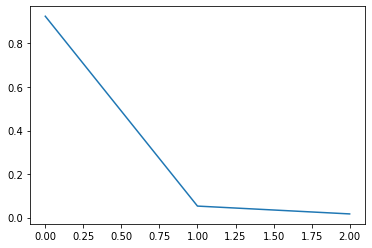

In [5]:
pcaIris = PCA(n_components=3)
pcaIris.fit(data)
plt.plot(pcaIris.explained_variance_ratio_)
plt.show()



# Projecting the data.

Project the data onto the first two principal components. Since you have class labels you can plot the 2-dimensional representation of the 3 classes in different colours.  The idea is to see how much class separation is obtained by projecting onto the first two principal components.

You should see something like the following - it will not be exactly the same, since the example image was generated on a subset of the data:

(**You need to provide the code in the following code cell**)

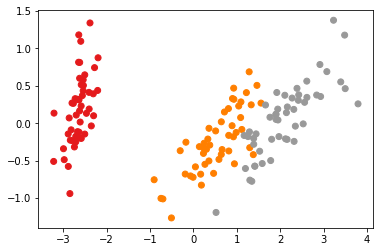

In [17]:
# Insert code to produce the image below
x = pcaIris.transform(data)
plt.scatter(x[:,0], x[:,1], c=labels, cmap=plt.cm.Set1)
plt.show()

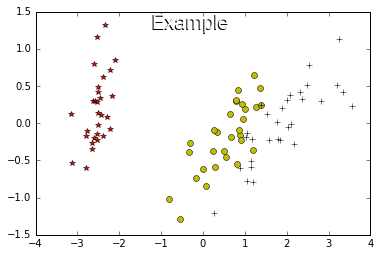

In [18]:
display(Image(filename='../resources/images/Iris_PCA.png'))

### Face recognition

A few years ago, facial recognition using the so-called eigenfaces was very much in fashion, see for example https://en.wikipedia.org/wiki/Eigenface. 


We now briefly explore the main ideas behind the eigenface approach using the Olivetti face database (provided to you as part of the assignment resources). 


First import  all .png files from all the directories inside a specified directory. Each  facial image is then converted to a flat array.


In [20]:
from skimage import io
ic = io.ImageCollection('../data/att_faces/*/*.png')

ic = np.array(ic)
ic_flat = ic.reshape((len(ic), -1))
number,m,n = ic.shape  

### Viewing the faces
Import an image viewer that allows you to step through/view all the loaded images using iPython widgets.

In [21]:
from ipywidgets import interact

def view_image(n=0):
    plt.imshow(ic[n], cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))

interactive(children=(IntSlider(value=0, description='n', max=398), Output()), _dom_classes=('widget-interact'…

In [22]:
pcaFaces = PCA(n_components=200)
pcaFaces.fit(ic_flat)

PCA(n_components=200)

### The fraction of the total variance captured by the principal directions.

The question arises how many principal components are needed to capture a significant amount of information of a face. For this it is useful to calculate the fraction of the total variance explained by $n$ components. Since this is such a useful quantity to investigate, scikit-learn provides it for us.


Note that the variance drops off very quickly. For something like $n=50$ components a significant proportion of the total variance is already captured. 

**Plot the explained variance.** You should see something like the following:

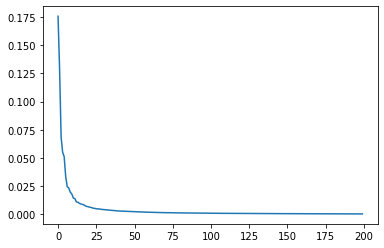

In [24]:
# Insert code to produce the image below
plt.plot(pcaFaces.explained_variance_ratio_)
plt.show()


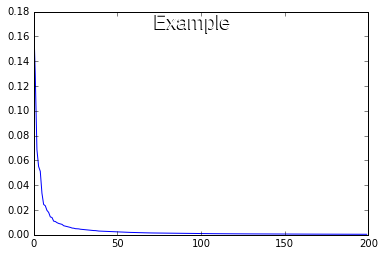

In [11]:
display(Image(filename='../resources/images/Faces_expl_var.png'))

### Projecting the faces onto the eigenfaces.

Now project all the images onto the 200 eigenfaces defined above. In order to visualise how much is lost, the projected images are projected back onto the original space. They are then reshaped and displayed.

In [25]:
pr_ic_flat = pcaFaces.transform(ic_flat)
back_pr_ic_flat = pcaFaces.inverse_transform(pr_ic_flat)

Restore the flattened array into its original shape, then view the restored images.  Keeping in mind that the dimension of the images are reduced from 10304 to 200, the reconstruction is quite good.

In [26]:
ic_restore = back_pr_ic_flat.reshape((number,m,n))

def view_image(n=0):
    plt.imshow(ic_restore[n],cmap='gray', interpolation='nearest')
    plt.show()

w = interact(view_image, n=(0, len(ic)-1))


interactive(children=(IntSlider(value=0, description='n', max=398), Output()), _dom_classes=('widget-interact'…

### Projecting something else

Above, we represented faces used to derive the eigenfaces in terms of the the eigenfaces. Not surprisingly the results are quite good. But the real interest is in faces not part of the training set.

We now project such a face. (See what happens if you try some else's face!)

First read in the face:

In [36]:
ben = io.ImageCollection('../resources/images/Ben_bw.png')[0]
ben = np.array(ben)

**Now display the face**. You should see something like:

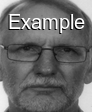

In [37]:
display(Image(filename='../resources/images/Ben_bw_wm.png'))

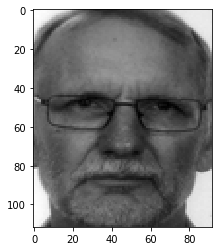

In [38]:
# Insert code to produce the image above (from the array!)
plt.imshow(ben, cmap='gray', interpolation='nearest')

**Flatten the face, project it onto 200 eigenfaces, restore it from the projection, and display.**

You should see something like:

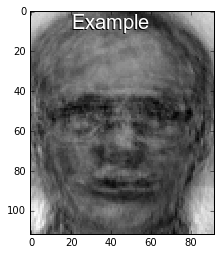

In [39]:
display(Image(filename='../resources/images/Ben_recon.png'))

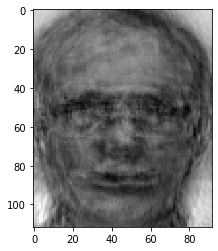

In [40]:
# Insert code to produce the image above
ben_flat = ben.reshape((1, -1))
ben_transformed = pcaFaces.transform(ben_flat)
ben_inv = pcaFaces.inverse_transform(ben_transformed)
ben_restored = ben_inv.reshape(ben.shape)
plt.imshow(ben_restored, cmap='gray', interpolation='nearest')
plt.show()

### Signatures

We are also going to use signatures in this course to illustrate various aspects of machine learning. One interesting task is building a signature verification system. One approach to do that is constructing a probabilistic model from a number of training signatures of each signatory (each individual in a database). This probabilistic model should capture and describe the natural variations between different signatures for each signatory. This of course has to be learned from the training signatures.

But signatures also vary as to the origin of whatever coordinate system we use, the size and (in-plane) rotation. It might be possible to also ask the system to recognize signatures at different positions, sizes and rotations, as the same signature. This however, vastly complicates the system and will demand a very large training set representing all these different situations. Instead, it is much easier to do some pre-processing normalizing the signatures. 

Although it will fail on some signatures, PCA is a valuable, simple tool for doing just this. At the same time it provides a great illustration of the underlying mechanism of the singular value decomposition. 

The next exercise will guide you through it.

First we import and display a signature. Feel free to experiment with other signatures.

Note that these signatures were captured on a digitising tablet, capturing the $x$ and $y$ coordinates, the pen pressure, the pen angle(tilt) and the pen direction. For now, we will only use the $x$ and $y$ coordinates, which are the first two features in the provided data.

**Note on the code that you will write:**

You will first calculate the SVD of the signature data (just for the $x,y$ coordinates). Then you will use the SVD factors to successively transform the orignal signature data. First you will simply rotate the data, then you will scale the data so that the standard deviation along the first principal axis equals 1, and finally, you will whiten the data.

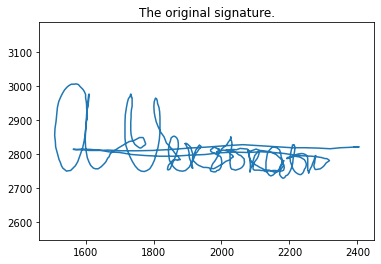

In [54]:
sign_full = np.loadtxt('../data/sign/sign3/sigtrain3_1.txt',comments = '%')  # Read Signature

sign = sign_full[:,:2].T

plt.plot(sign[0,:],sign[1,:])
plt.axis('equal')
plt.title('The original signature.')
plt.show()

### Removing the mean

The first step is to remove the mean of the signature. This centers the signature, i.e. normalizes it with respect to position. 

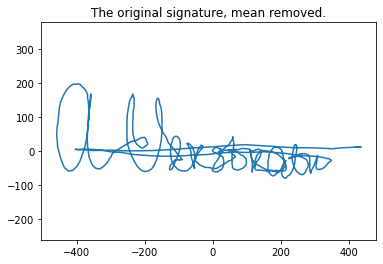

In [55]:
d,n = sign.shape
mean = np.mean(sign,axis=1)[:,np.newaxis]
sign = (sign - mean)

plt.plot(sign[0,:],sign[1,:])
plt.axis('equal')
plt.title('The original signature, mean removed.')
plt.show()

### Calculating the principal components

We calculate the principal components using the SVD. We illustrate the principal directions as well as the one standard deviation by calculating the one standard deviation ellipse, aligned along the principal directions. 

**Getting the sign right**: Since the sign of eigenvectors (principal directions) is not determined, there is no way of predicting whether they are returned with a specific sign. In this case it matters because if the sign is wrong, the signature is reflected around the coordinate axis. It is therefore necessary to check whether the sign is correct, and if not, flip it. The simple expedient used here is to assume that the signatures are produced from left to right. This means that the $x$ component of the first principal direction, and the $y$ component of the second principal direction should both be positive. This will obviously not catch all cases, but should hopefully work for most cases.

Once we have a suitable SVD, the code defines a circle which will be mapped to an ellipse using the covariance of the data (signature).  Have a good look at the details of this calculation.

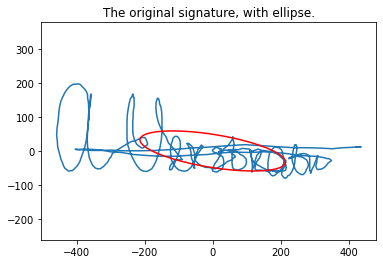

In [56]:
# Calculate the principal directions using the SVD
u, s, vh = np.linalg.svd(sign,full_matrices=False)

sgn = np.sign(u[0,0])
u[:,0] = sgn*u[:,0]
vh[0,:] = sgn*vh[0,:]

sgn = np.sign(u[1,1])
u[:,1] = sgn*u[:,1]
vh[1,:] = sgn*vh[1,:]

# Define Circle
ang = np.linspace(0,2*np.pi,500)
x = np.cos(ang); y = np.sin(ang)
circ = np.vstack((x,y))

# Ellipse aligned with principal directions, one standard deviation intersect.
# Note scaling of singular values so that scaled values express the standard deviations.
ell = u.dot(np.diag(s/np.sqrt(n))).dot(circ)

plt.plot(sign[0,:],sign[1,:])
plt.plot(ell[0,:],ell[1,:],'r')
plt.axis('equal')
plt.title('The original signature, with ellipse.')
plt.show()

### Rotating the signature

**Rotate the signature so that the principal axes coincide with the coordinate axes.**

Do this by using **only** the SVD components. Do **not** rotate by multiplying the original with a rotation matrix.

You should see something like:



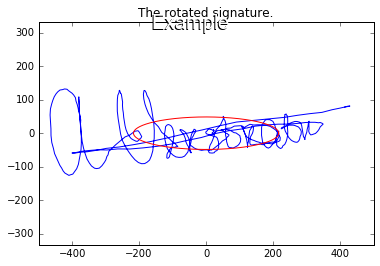

In [57]:
display(Image(filename='../resources/images/sign_rot.png'))

In [64]:
# Insert code to produce the image above
# data[:,:,np.newaxis] 
s = u.dot(np.diag(s/np.sqrt(n))).dot(sign)
# s = u[:,:,np.newaxis]*sign
# e = u[:,:,np.newaxis]*ell

plt.plot(s[0,:],s[1,:])
# plt.plot(ell[0,:],ell[1,:],'r')
plt.axis('equal')
plt.title('The original signature, with ellipse.')
plt.show()

ValueError: Input must be 1- or 2-d.

### Scale the signature

**Scale the signature, preserving the aspect ratio so that the standard deviation along the first principal axis is 1.**

You should see the following (it looks very much like the previous image, except for the scale):

In [24]:
# Insert code to produce the image below


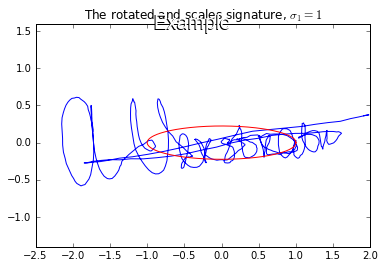

In [25]:
display(Image(filename='../resources/images/sign_rot_scale.png'))

### Whiten the signature

**Now scale the signature without preserving the aspect ratio, so that the standard deviations along both principal directions equal 1.**

You should see:

(Note that the ellipse has become a circle!)

In [26]:
# Insert code to produce the image below


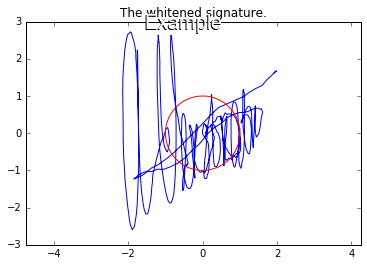

In [27]:
display(Image(filename='../resources/images/sign_white.png'))

# Some more investigation for PCA


* Above you projected the face not in the database `Ben_bw.png` onto 200 eigenfaces. Now write a function that will take the number of eigenfaces as an parameter to to the reconstruction. Make use of the `interact` function to scroll through the reconstructions as the parameter is varied. Choose the number of components you want to display.

* Use all five features of the signatures. First investigate whether the data is really 5 dimensional by investigating the magnitudes of the singular values.

* Project the 5 dimensional signature onto the first two principal components. Then reconstruct the 5 dimensional signature from the projected data and display the signature again by plotting the (x, y) coordinates. How much information do you lose by projecting down to two dimensions.

# Linear Discriminant Analysis (LDA)

The PCA encountered above can be viewed as a dimensionality reduction scheme, projecting onto the directions with maximal variance.

LDA is also a dimensionality reduction scheme but operates on a very different principle. Now we are given data that are labelled as belonging to different classes: We are given both the input value $x$ and a class label $y$ corresponding to $x$ for each data point. If we have $k$ classes then $y$ will take on one of $k$ values. (In Python, we'll typically use the values 0 through $k-1$.)

The idea is now to project the data onto a lower-dimensional space in such a way that maximal *class separation* is achieved in the lower-dimensional space.  Thus, the axis system we choose will no longer only maximize variance, but it will instead help to more clearly distinguish class membership.

You can learn more about the scikit-learn implementation of LDA at http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

You will investigate the difference between PCA and LDA using the wine data set - for more information see  http://archive.ics.uci.edu/ml/datasets/Wine. Since the wine dataset is 13-dimensional, the difference between PCA and LDA is more pronounced than with the Iris data set. 

We project down to 2 dimensions for easy visualization. In fact, since there are only 3 classes, one does not retain any more information by using higher dimensions. (Make sure you understand why!)

### Simple example

As a warmup run the example from the scikit-learn website.  What is this code doing?

In [28]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LDA()
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

[1]


### Loading the data

Read the data, extract the class labels from the last column, then extract the names of the classes using the convenient `set` type.

In [29]:
wine_train = np.loadtxt('../data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes,dtype=int)
wine_train_labels = np.array(wine_train_labels,dtype = int)
wine_train = wine_train[:,:-1]

wine_test = np.loadtxt('../data/wine/wine_test.txt',delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes,dtype=int)
wine_test_labels = np.array(wine_test_labels,dtype = int)
wine_test = wine_test[:,:-1]

### PCA

**Project the data onto 2 PCA components and display the classes of the dimension-reduced data.**

You should see something like:

In [30]:
# Insert code to produce the image below


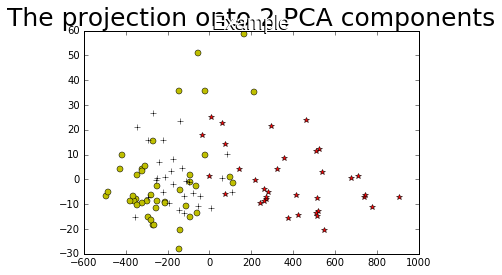

In [31]:
display(Image(filename='../resources/images/Wine_PCA.png'))

### LDA

**Fit an LDA model to the data, using 2 components and display the different classes of the projected data.**

You should see: 

In [32]:
# Insert code to produce the image below


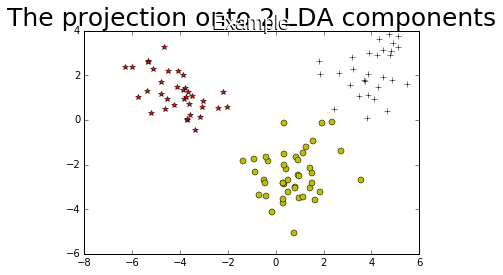

In [33]:
display(Image(filename='../resources/images/LDA_pr.png'))

There should be no doubt that the LDA projection is much better at preserving the class structure.  However, to quantify it, you can use your nearest neighbour classifier from Assignment 0 to compare the classification performance when using the means of the original data, versus transforming data with LDA or PCA.  One way to summarize your findings is with a *confusion matrix*.

# Do it yourself!

Much of what you have done above made use of the PCA and LDA libraries.  Now write your own code to perform first PCA and then LDA, and use it to analyze the above data sets (and some others you find online).  The idea is to get a thorough understanding of the process *and intermediate steps* when performing PCA and LDA.  Your implementations can still make use of the SVD or eigenvalue decomposition subroutines (try implementing it with both approaches) - implementing those is outside the scope of this course.

Do some small examples by hand to use as test cases.  If your hand-calculated approach or the result of your implementation differs from those in sklearn, try to figure out why.

Some advice:
* Add an option to perform whitening in the PCA implementation.
* Implement the LDA using your PCA implementation.  To do this, you will need the whitening option above, but also the ability to construct principal components directly from a covariance matrix, rather than the underlying data.  So provide an option to PCA indicating whether you are providing a data matrix or a covariance matrix.
* When performing PCA on a data matrix, you will generally first want to centre the data before calculating the SVD.  When transforming future points, or performing reconstruction, you will need to take the mean into account.